In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pickle

In [2]:
data = pd.read_csv(r'.\Data\house-data.csv')

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5505,1105000780,20150403T000000,425000.0,3,1.50,1660,5665,1.0,0,0,...,7,920,740,1918,0,98118,47.5391,-122.274,1530,5665
1339,5104450070,20150309T000000,435000.0,4,2.25,2730,7506,2.0,0,0,...,8,2730,0,1987,0,98058,47.4627,-122.152,2390,8015
12966,3223059123,20140630T000000,550000.0,4,1.50,2750,128502,1.0,0,0,...,7,1500,1250,1958,0,98055,47.4345,-122.198,1470,11514
15906,9558020460,20140604T000000,427500.0,4,2.50,2460,5091,2.0,0,0,...,9,2460,0,2003,0,98058,47.4500,-122.121,2490,4750
3358,7212650850,20150427T000000,304000.0,3,2.50,1710,6773,2.0,0,0,...,8,1710,0,1993,0,98003,47.2635,-122.312,2220,7551


In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# fjerne 3 decimaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [9]:
data['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [10]:
data['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

<Axes: xlabel='price'>

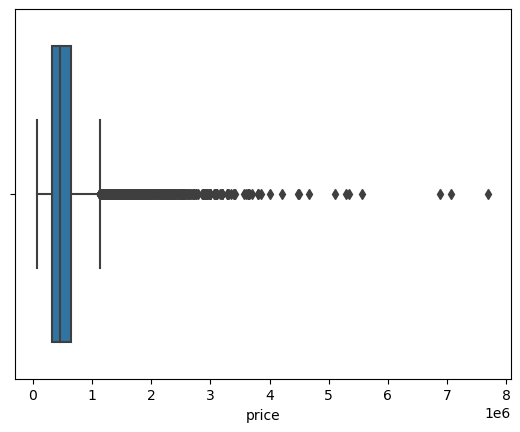

In [11]:
sns.boxplot(x=data['price'])

<Axes: xlabel='price', ylabel='count'>

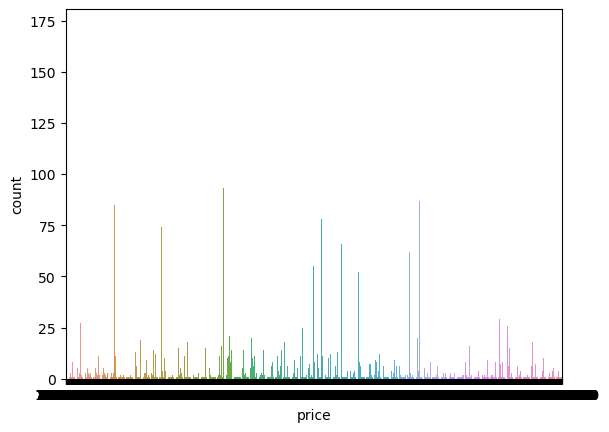

In [12]:
sns.countplot(x=data['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

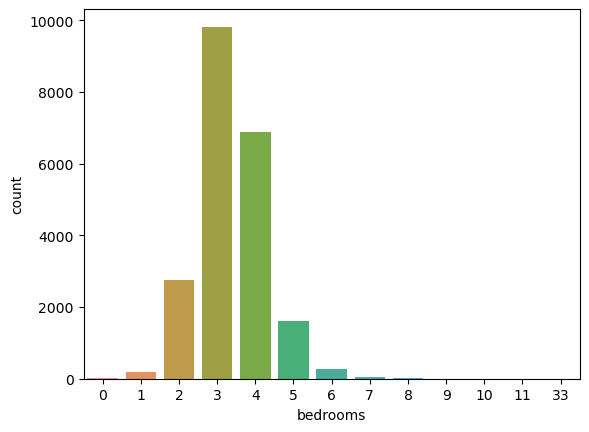

In [13]:
sns.countplot(x=data['bedrooms'])

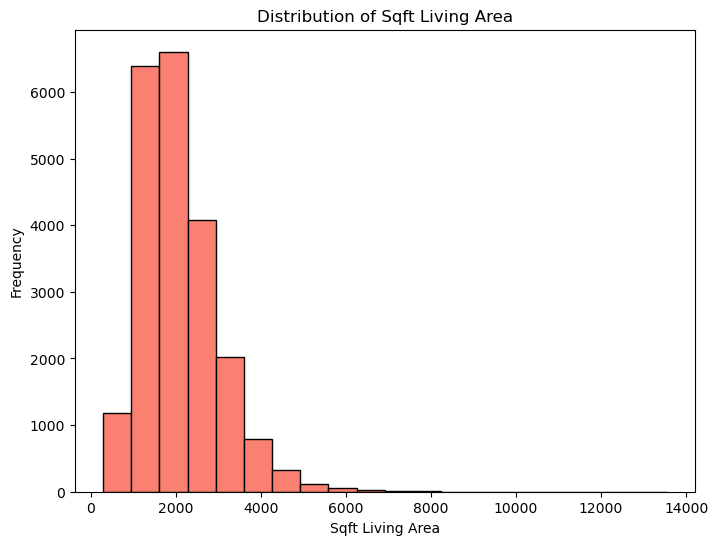

In [14]:
# Visualisering af fordelingen af "sqft_living"
plt.figure(figsize=(8, 6))
plt.hist(data['sqft_living'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sqft Living Area')
plt.xlabel('Sqft Living Area')
plt.ylabel('Frequency')
plt.show()

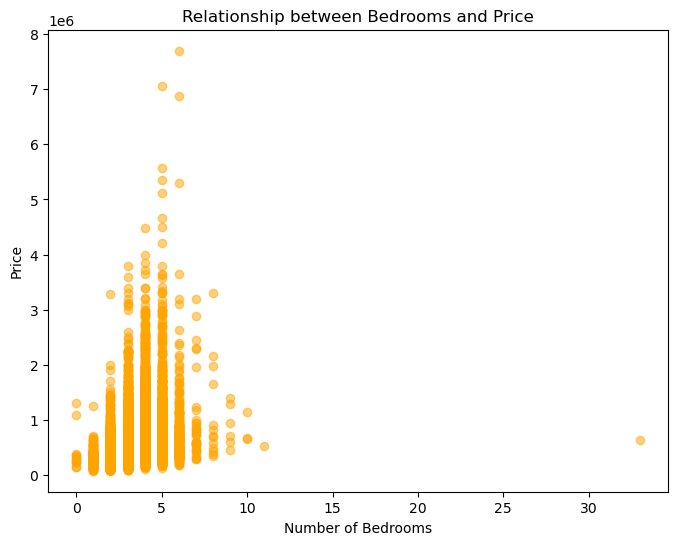

In [15]:
# Analysere relationen mellem "bedrooms" og "price"
plt.figure(figsize=(8, 6))
plt.scatter(data['bedrooms'], data['price'], color='orange', alpha=0.5)
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [16]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Antal komponenter, du ønsker at beholde
n_components = 19  # eller mindre, baseret på antallet af samples og features i dine data

# Antag at 'data' er et dictionary, som skal konverteres til en pandas DataFrame
data_df = pd.DataFrame(data)

data_df.drop(['id', 'date'], axis=1, inplace=True)

# Forbered data til PCA ved at standardisere det
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)

# Initialiserer PCA-modellen
pca = PCA(n_components=n_components)

# Anvender PCA på dine data
data_pca = pca.fit_transform(data_scaled)

# Udskriv dimensionerne af den resulterende data efter PCA
print("Dimensioner efter PCA:", data_pca.shape)


Dimensioner efter PCA: (21613, 19)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [18]:
# Definér features og target variabel
X = data_df.drop('price', axis=1).values
y = data_df['price'].values

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Udskriv størrelsen af trænings- og testssættene
print("Størrelse af træningssæt:", X_train.shape[0])
print("Størrelse af testssæt:", X_test.shape[0])

Størrelse af træningssæt: 17290
Størrelse af testssæt: 4323


Explained Variance Ratio for each component: [2.98706050e-01 1.27107770e-01 9.71101675e-02 7.25173664e-02
 6.35052253e-02 5.29717864e-02 4.93086988e-02 4.40343935e-02
 3.47733504e-02 3.16396863e-02 2.69960697e-02 2.21205301e-02
 1.74759120e-02 1.54851902e-02 1.39287694e-02 1.24869134e-02
 1.02221929e-02 9.60992764e-03 1.39018004e-33]


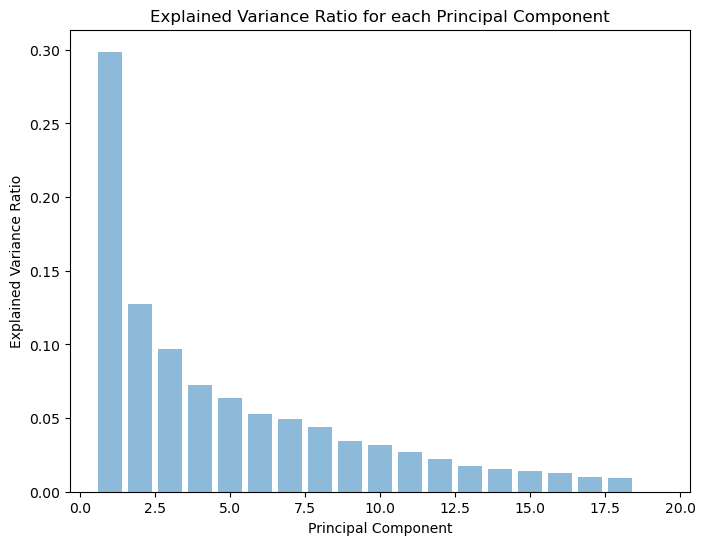

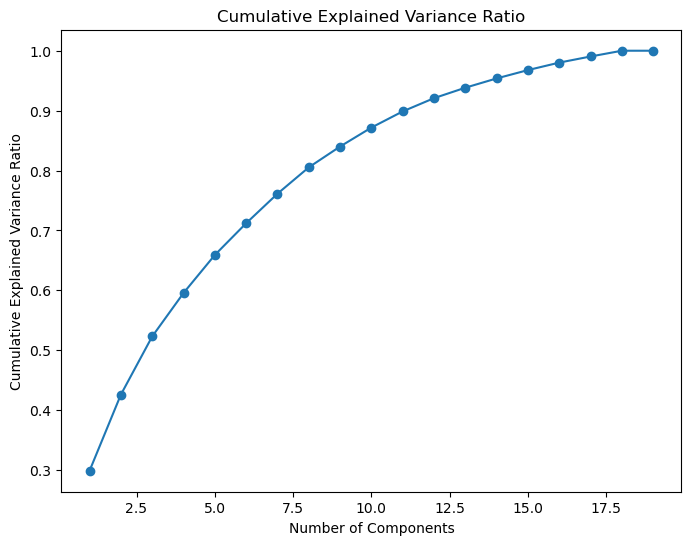

In [21]:
# Udskriv forklaret varians for hver komponent
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_variance_ratio)

# Visualisering af forklaret varians
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

# Plot kumulativ forklaret varians
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()


Attribute Weights for each PCA Component:
              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
Component 1   0.299     0.235      0.349        0.388     0.094   0.218   
Component 2   0.301     0.085      0.016        0.124    -0.136  -0.160   
Component 3   0.010    -0.015     -0.114        0.033     0.550  -0.334   
Component 4   0.095    -0.371     -0.081       -0.119     0.256   0.298   
Component 5   0.032     0.086      0.027        0.062     0.269   0.055   
Component 6  -0.082     0.191      0.073        0.041    -0.031   0.005   
Component 7  -0.264     0.247      0.205        0.062     0.150   0.083   
Component 8   0.015     0.131      0.019        0.010     0.052   0.344   
Component 9  -0.073     0.470      0.169       -0.059     0.079   0.176   
Component 10 -0.010     0.449     -0.304        0.076    -0.043  -0.304   
Component 11 -0.199     0.314      0.010       -0.110    -0.008   0.192   
Component 12  0.229     0.166     -0.042       -0.105     

<Figure size 1200x800 with 0 Axes>

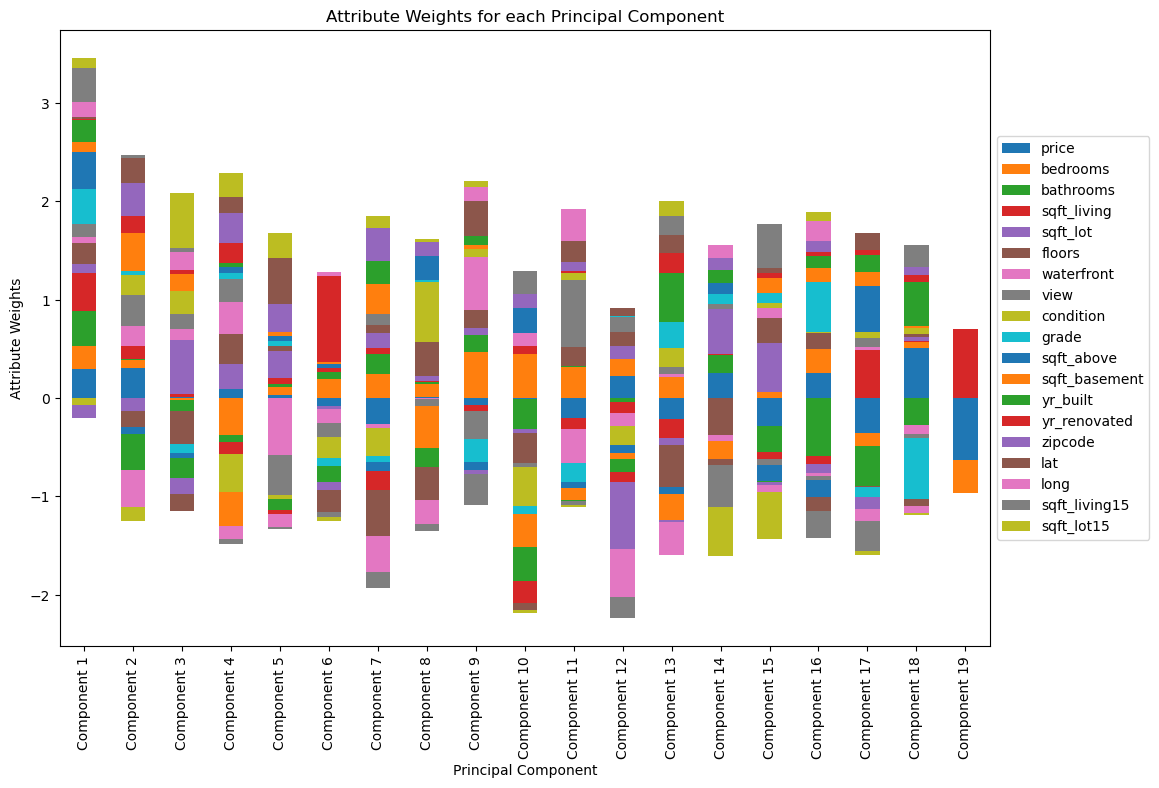

In [22]:
# Udskriv attributvægte for hver PCA-komponent
component_names = [f"Component {i+1}" for i in range(len(pca.components_))]
component_weights_df = pd.DataFrame(pca.components_, columns=data_df.columns, index=component_names)
print("Attribute Weights for each PCA Component:")
print(component_weights_df)

# Visualisering af attributvægte for hver PCA-komponent
plt.figure(figsize=(12, 8))
component_weights_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Principal Component')
plt.ylabel('Attribute Weights')
plt.title('Attribute Weights for each Principal Component')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


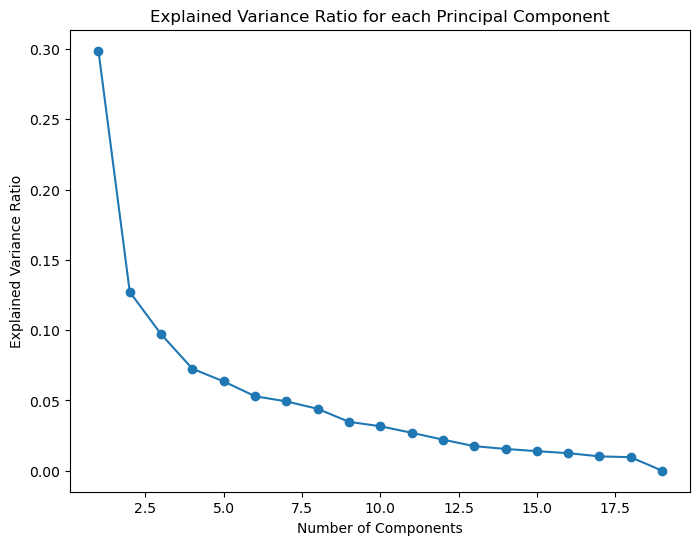

In [23]:
# Plot forklaret varians for hver komponent
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

## Anvendelse af multiple linear regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Initialiser og træn modellen
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
# Forudsige priser for testssættet
y_pred_linreg = linreg.predict(X_test)

In [27]:
# Forudsige priserne ved brug af de trænede modeller
y_predicted_linear = linreg.predict(X_test)

In [28]:
# Evaluere modellen
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

In [29]:
# Lineær regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)

In [30]:
print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linreg)
print("R-squared (R2):", r2_linreg)



Linear Regression:
Mean Squared Error (MSE): 45173046132.789894
R-squared (R2): 0.701190444887843


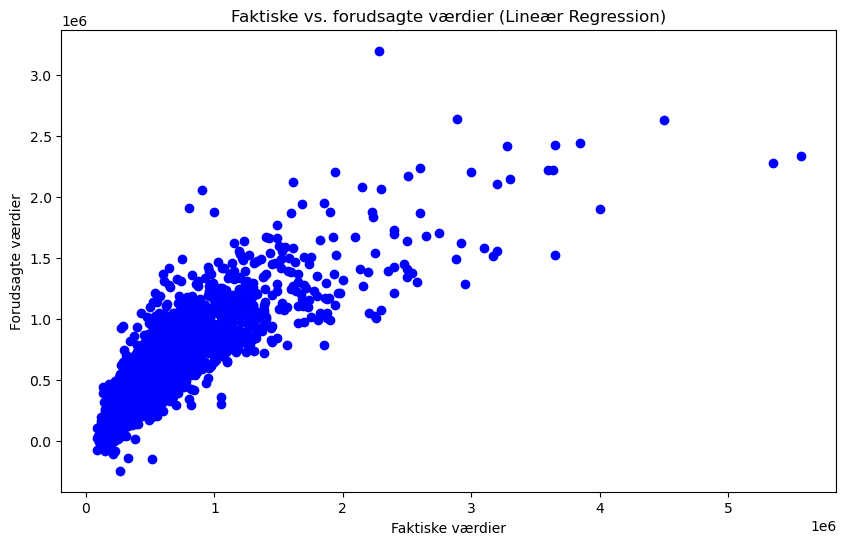

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_predictions, color='blue')
plt.title('Faktiske vs. forudsagte værdier (Lineær Regression)')
plt.xlabel('Faktiske værdier')
plt.ylabel('Forudsagte værdier')
plt.show()


### Anvendelse af polynomial regression

In [32]:
# Initialiser og træn modellen
multi_linreg = LinearRegression()
multi_linreg.fit(X_train, y_train)

# Forudsige priser for testssættet
y_pred_multi_linreg = multi_linreg.predict(X_test)


In [33]:
# Evaluere modellen
mse_multi_linreg = mean_squared_error(y_test, y_pred_multi_linreg)
r2_multi_linreg = r2_score(y_test, y_pred_multi_linreg)

print("Multiple Linear Regression:")
print("Mean Squared Error (MSE):", mse_multi_linreg)
print("R-squared (R2):", r2_multi_linreg)

Multiple Linear Regression:
Mean Squared Error (MSE): 45173046132.789894
R-squared (R2): 0.701190444887843


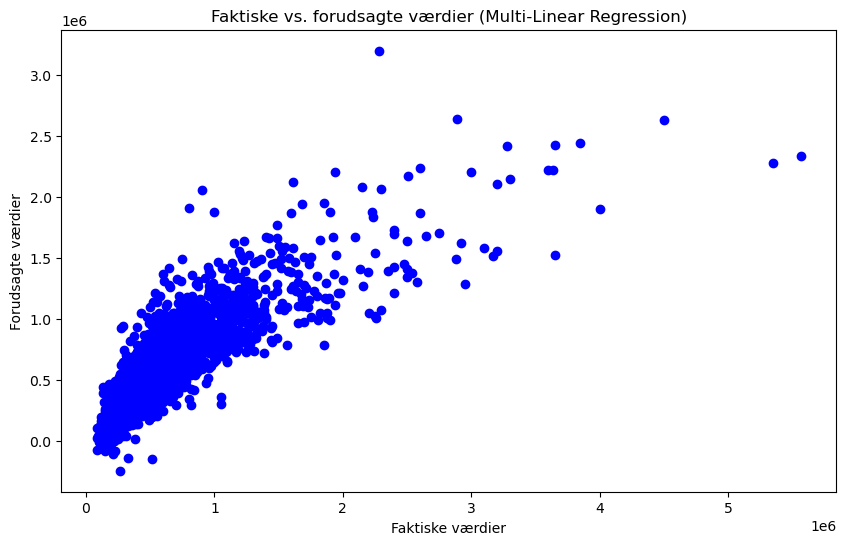

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi_linreg, color='blue')
plt.title('Faktiske vs. forudsagte værdier (Multi-Linear Regression)')
plt.xlabel('Faktiske værdier')
plt.ylabel('Forudsagte værdier')
plt.show()


### Anvendelse af polynomial regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [36]:
# Definér en pipeline til at udføre polynomial regression
degree = 2  # Grad af polynomium
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [37]:
# Træn modellen
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [38]:
# Forudsige priser for testssættet
y_pred_polyreg = polyreg.predict(X_test)

In [39]:
# Evaluere modellen
mse_polyreg = mean_squared_error(y_test, y_pred_polyreg)
r2_polyreg = r2_score(y_test, y_pred_polyreg)

print("Polynomial Regression:")
print("Mean Squared Error (MSE):", mse_polyreg)
print("R-squared (R2):", r2_polyreg)

Polynomial Regression:
Mean Squared Error (MSE): 30465477425.176292
R-squared (R2): 0.798477708832469


In [40]:
import statsmodels.api as sm


In [41]:
def olsi(data, f_colums):
    X = data[f_colums]
    y = data['price']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

In [42]:
f_colums = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [43]:
model = olsi(data, f_colums)

In [44]:
model.aic

589241.5582656391

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:54:50   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
bedrooms      -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
bathrooms      4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
sqft_living     110.4421      2.270     48.661      0.000     105.994     114.891
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
condition      2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
sqft_above       70.7859      2.253     31.413      0.000      66.369      75.203
sqft_basement    39.6584      2.647     14.985      0.000      34.471      44.846
yr_built      -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
yr_renovated     19.8126      3.656      5.420      0.000      12.647      26.978
zipcode        -582.4199     32.986    -17.657      0.000    -647.074    -517.765
lat            6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6814      3.448      6.289      0.000      14.924      28.439
sqft_lot15       -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     4.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
model_file = './deploy/mypolifit.pkl'

In [47]:
# Save now
with open(model_file, 'wb') as f:
    pickle.dump(polyreg, f)

FileNotFoundError: [Errno 2] No such file or directory: './deploy/mypolifit.pkl'

In [ ]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    mymodel = pickle.load(f)

In [ ]:
# Test reading from the file(virker ikke, da jeg ikke har en model at læse fra)
predict = np.poly1d(mymodel)
prediction = predict([91])
print(prediction)

TypeError: unsupported operand type(s) for +: 'int' and 'PolynomialFeatures'

What type/s of regression have you applied?<br>

Vi har anvendt følgende typer regression:<br>

Lineær regression<br>
Multiple lineær regression<br>
Polynomiel regression<br>


Which were the challenges?<br>

Nogle af de udfordringer, vi stødte på, inkluderede:<br>
Behandling af manglende værdier i datasættet.<br>
Valg af de mest relevante og informative attributter.<br>
Optimering af modelparametre for at forbedre prædiktionsnøjagtighed.<br>

How accurate is your solution?<br>

Vi evaluerede nøjagtigheden af vores løsning ved hjælp af Mean Squared Error (MSE) og R-squared (R2) for hver af de anvendte regressionsmodeller. Resultaterne viste, at polynomiel regression opnåede den højeste nøjagtighed blandt de anvendte modeller, med en R2-værdi på 0.72.<br>

What could be done for further improvement of the accuracy?<br>

For at forbedre nøjagtigheden af vores løsning kunne vi overveje følgende:<br>

Udforske og anvende avancerede regresionsteknikker eller ensamble-metoder såsom Random Forest Regression eller Gradient Boosting Regression.<br>
Finjustere modelparametrene ved hjælp af gitter-søgning eller krydsvalidering for at optimere modellens præstation.<br>
Eksperimentere med feature engineering teknikker for at udlede nye og mere informative attributter fra de eksisterende.<br>